# **Clustering-3**

### Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

**Clustering** is a technique in machine learning and statistics that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). The goal is to identify natural groupings within a dataset based on a measure of similarity.

**Examples of Applications**:
1. **Market Segmentation**: Grouping customers based on purchasing behavior, demographics, or other characteristics for targeted marketing.
2. **Image Segmentation**: Dividing an image into segments for object detection or image analysis.
3. **Document Clustering**: Organizing a large collection of documents into clusters for topic extraction and information retrieval.
4. **Anomaly Detection**: Identifying unusual patterns or outliers in data, such as fraud detection in financial transactions.
5. **Biological Data Analysis**: Grouping genes or proteins with similar expression patterns for understanding biological functions and interactions.

### Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a clustering algorithm that forms clusters based on the density of data points in the feature space.

**Differences from Other Clustering Algorithms**:
- **DBSCAN**:
  - **Density-Based**: Forms clusters based on regions of high density separated by regions of low density.
  - **Handles Noise**: Can identify and exclude noise (outliers) from the clustering process.
  - **Non-Spherical Clusters**: Can find arbitrarily shaped clusters.
  - **No Need to Specify Number of Clusters**: Automatically determines the number of clusters based on the density parameters.
  
- **K-means**:
  - **Centroid-Based**: Partitions data into K clusters by minimizing the variance within each cluster.
  - **Spherical Clusters**: Assumes clusters are spherical and equally sized.
  - **Fixed Number of Clusters**: Requires pre-specification of the number of clusters (K).
  
- **Hierarchical Clustering**:
  - **Hierarchical Structure**: Creates a nested hierarchy of clusters.
  - **No Fixed Number of Clusters**: Dendrogram can be cut at different levels to obtain various numbers of clusters.
  - **Agglomerative or Divisive**: Can merge small clusters into larger ones (agglomerative) or split large clusters into smaller ones (divisive).

### Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?

1. **Epsilon (ε)**: Maximum distance between two points to be considered neighbors.
2. **MinPts**: Minimum number of points required to form a dense region (a cluster).

**Determining Optimal Values**:
1. **K-Distance Plot**:
   - Plot the distances of each point to its k-th nearest neighbor (usually k = MinPts).
   - Look for the "elbow" point in the plot where the distance sharply increases. This point indicates a suitable ε value.

2. **Domain Knowledge**:
   - Use prior knowledge about the dataset to choose meaningful values for ε and MinPts.

3. **Grid Search**:
   - Perform a grid search over a range of ε and MinPts values and evaluate clustering performance using validation metrics.

### Q4. How does DBSCAN clustering handle outliers in a dataset?

**Handling Outliers**:
- **Noise Points**: Points that do not belong to any cluster (i.e., they have fewer than MinPts neighbors within distance ε) are labeled as noise or outliers.
- **Cluster Formation**: Clusters are formed by densely connected points, and points that do not meet the density criteria are automatically excluded as outliers.

### Q5. How does DBSCAN clustering differ from k-means clustering?

**Differences**:
1. **Cluster Shape**:
   - **DBSCAN**: Can find clusters of arbitrary shape.
   - **K-means**: Assumes spherical clusters.
   
2. **Number of Clusters**:
   - **DBSCAN**: Does not require pre-specification of the number of clusters.
   - **K-means**: Requires pre-specification of the number of clusters (K).
   
3. **Handling Outliers**:
   - **DBSCAN**: Can identify and exclude outliers (noise).
   - **K-means**: Sensitive to outliers which can skew the cluster centroids.
   
4. **Cluster Density**:
   - **DBSCAN**: Forms clusters based on density and can handle varying densities.
   - **K-means**: Assumes equal density clusters.

### Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?

Yes, DBSCAN can be applied to high-dimensional datasets, but there are challenges:

1. **Curse of Dimensionality**: In high-dimensional spaces, the concept of distance becomes less meaningful, and points tend to be equidistant from each other.
2. **Parameter Sensitivity**: Selecting appropriate ε and MinPts values becomes more difficult as dimensionality increases.
3. **Computational Complexity**: DBSCAN's time complexity increases with the number of dimensions and points.

**Potential Solutions**:
- **Dimensionality Reduction**: Apply techniques like PCA or t-SNE to reduce the number of dimensions before clustering.
- **Efficient Indexing**: Use spatial indexing structures like KD-trees or Ball-trees to speed up neighbor searches.

### Q7. How does DBSCAN clustering handle clusters with varying densities?

DBSCAN can struggle with clusters of varying densities because the ε and MinPts parameters are fixed for the entire dataset. To address this:

1. **OPTICS (Ordering Points To Identify the Clustering Structure)**: An extension of DBSCAN that can handle varying densities by ordering points based on their density.
2. **Adaptive Parameters**: Use adaptive or varying ε and MinPts values based on local densities.

### Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

1. **Silhouette Score**: Measures the cohesion and separation of clusters. Higher values indicate better-defined clusters.
2. **Adjusted Rand Index (ARI)**: Compares the similarity between the clustering result and a ground truth classification.
3. **Normalized Mutual Information (NMI)**: Measures the mutual dependence between the clustering result and ground truth.
4. **Homogeneity and Completeness**: Assess whether each cluster contains only members of a single class (homogeneity) and if all members of a given class are assigned to the same cluster (completeness).

### Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

Yes, DBSCAN can be used in semi-supervised learning:

1. **Label Propagation**: Use clusters formed by DBSCAN to propagate labels to nearby unlabeled points.
2. **Noise Handling**: Identify noise points and exclude them from the training set to improve the quality of the labeled data.

### Q10. How does DBSCAN clustering handle datasets with noise or missing values?

**Noise Handling**:
- DBSCAN explicitly identifies noise points and labels them as outliers, which are not included in any cluster.

**Missing Values**:
- Preprocessing is typically required to handle missing values, such as imputation or removal of incomplete records. DBSCAN itself does not handle missing values directly.

### Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.



**Discussion of Clustering Results**:
- **Estimated Number of Clusters**: The algorithm identifies distinct clusters based on density.
- **Noise Points**: Points labeled as -1 are considered noise and are not part of any cluster.
- **Cluster Interpretation**: The clusters

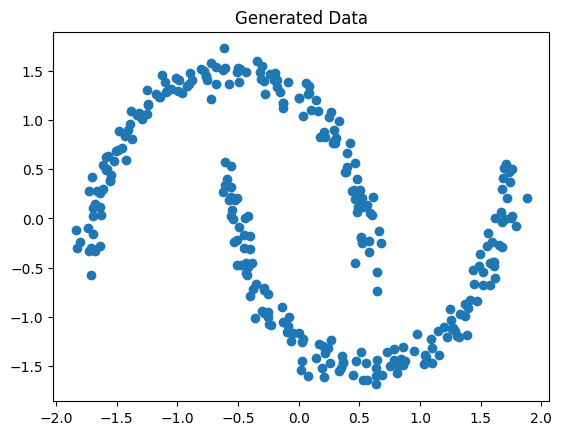

Estimated number of clusters: 2
Estimated number of noise points: 0


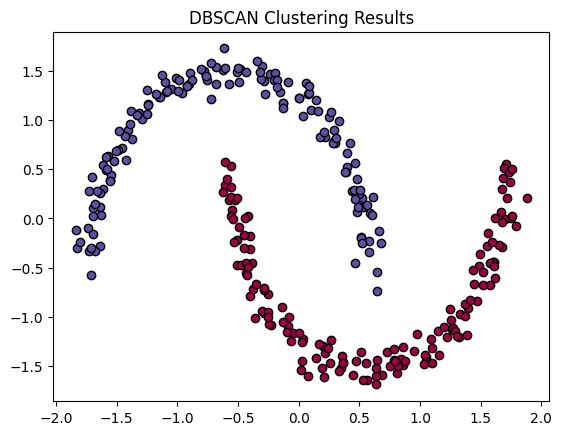

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Standardize features
X = StandardScaler().fit_transform(X)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.show()

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot the points that are part of the cluster
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Results')
plt.show()


# **COMPLETE**